# 1. Functions, libraries and packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [51]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [52]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('shubhambathwal/flight-price-prediction', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


In [53]:
df = pd.read_csv(r'/data/Clean_Dataset.csv')

In [54]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# 3. EDA

In [55]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Unnamed: 0,300153,0,int64,300153
1,airline,300153,0,object,6
2,flight,300153,0,object,1561
3,source_city,300153,0,object,6
4,departure_time,300153,0,object,6
5,stops,300153,0,object,3
6,arrival_time,300153,0,object,6
7,destination_city,300153,0,object,6
8,class,300153,0,object,2
9,duration,300153,0,float64,476


In [56]:
df.airline.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [57]:
df.source_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [58]:
df.destination_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [59]:
df.departure_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [60]:
df.arrival_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [61]:
df.stops.value_counts()
# if there are only 2 unique values, we can probably just use a binary encoding, but they are three unique values so we will use ordinal encoding


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [62]:
# not nan values
# a lot of object values to be converted to categorical
# Overall, the dataset is clean and ready for analysis

In [63]:
df['class'].value_counts()
# Only two unique values, we can probably just use a binary encoding

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [64]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

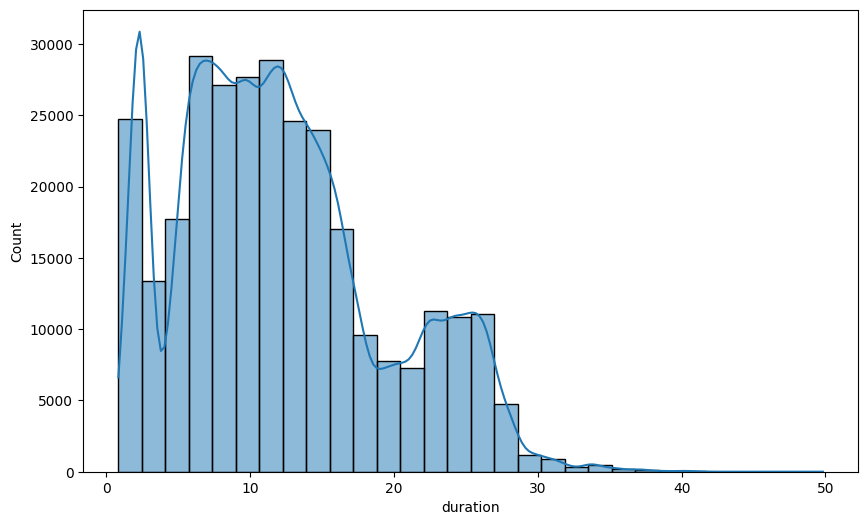

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
# overall not necessary to create a categories (interval) for the duration, we can just use the float values

In [66]:
#df.days_left is not necessary to encode becasue it is already a number

# 4. Preprocesing

In [67]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['stops'] = pd.factorize(df['stops'])[0]

In [68]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [69]:
cols_one_hot = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']

for col in cols_one_hot:
    df[col] = df[col].astype('category')
# Convert categorical columns to category dtype
for col in cols_one_hot:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# 5. Model training

In [ ]:
!pip instal3
skprogress

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement skprogress (from versions: none)

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for skprogress


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [71]:
#standart scaler is not nesessary because we are using a tree based model
# but if want to use it, we can use the following code
# num_cols = ['duration', 'days_left']

# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [72]:
X,y = df.drop('price', axis=1), df['price']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [74]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(192097, 34) (192097,)
(48025, 34) (48025,)
(60031, 34) (60031,)


In [87]:
reg_model = RandomForestRegressor(n_jobs=-1, random_state=42)
reg_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [91]:
predictions_val = reg_model.predict(X_val)

In [94]:
mae = mean_absolute_error(y_val, predictions_val)
mse = mean_squared_error(y_val, predictions_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions_val)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 1104.89
MSE: 7587241.21
RMSE: 2754.49
R^2: 0.99


Text(0.5, 1.0, 'True vs Predicted Values')

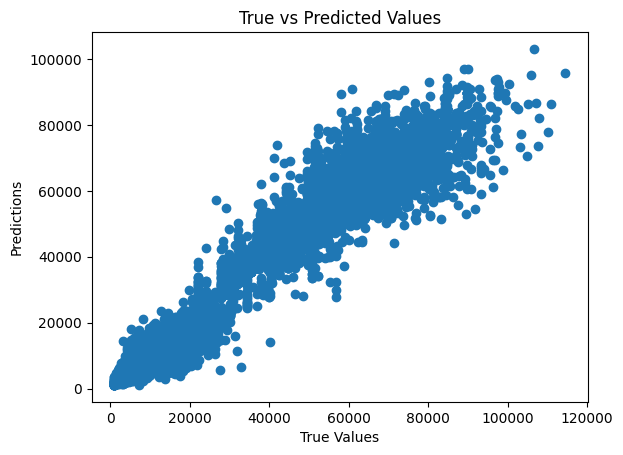

In [97]:
plt.scatter(y_val, predictions_val)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')

In [98]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

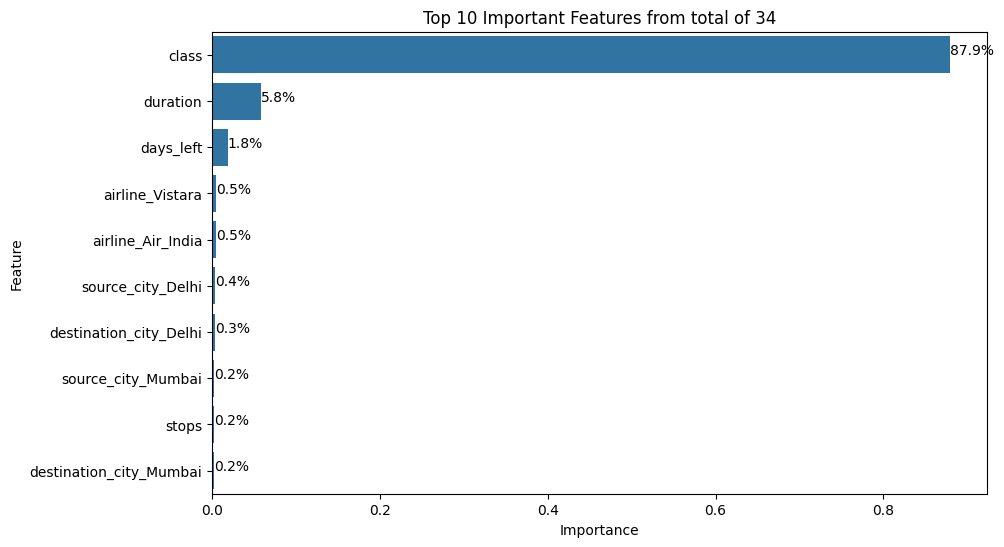

In [110]:
# sorting of most important features
importances = reg_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
plt.figure(figsize=(10, 6))
importances_df = importances_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))

# data labels
for index, value in enumerate(importances_df['Importance'].head(10)):
    plt.text(value, index, f'{value*100:.1f}%')

plt.title(f'Top 10 Important Features from total of {len(importances_df)}')
plt.show()

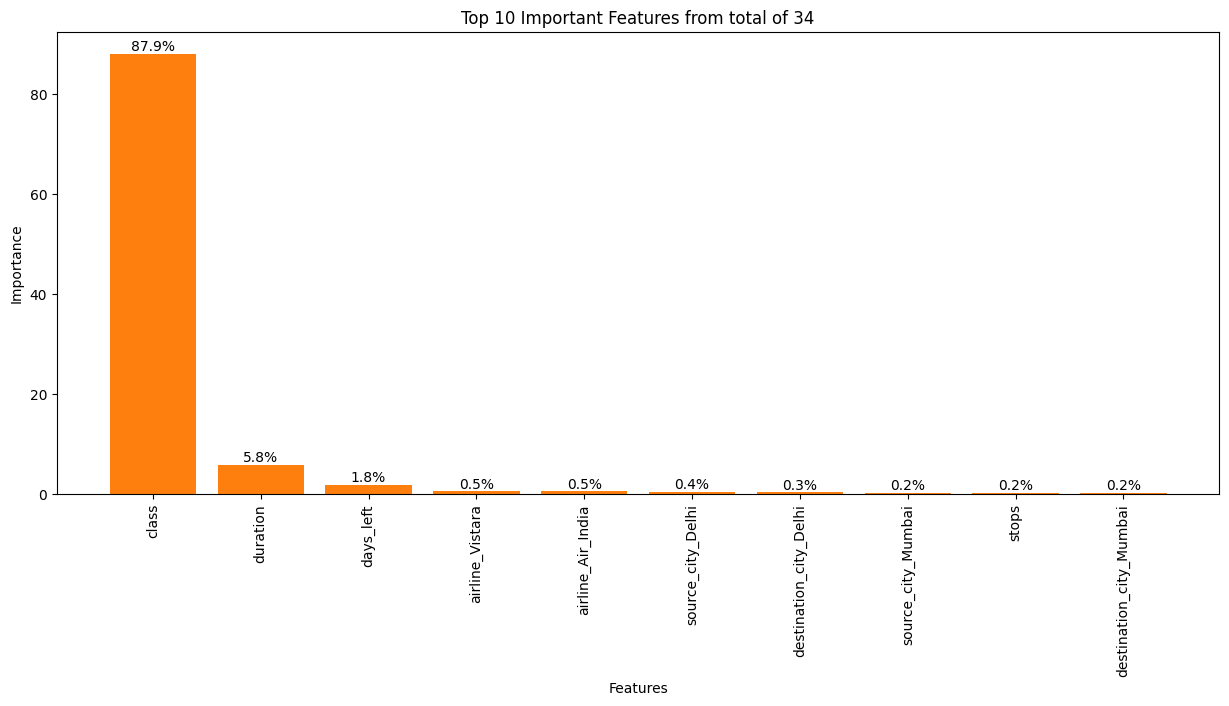

In [123]:
plt.figure(figsize=(15, 6))
plt.bar( x = importances_df['Feature'].head(10), height = importances_df['Importance'].head(10))
plt.xticks(rotation=90)
plt.title(f'Top 10 Important Features from total of {len(importances_df)}')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar_label(plt.bar( x = importances_df['Feature'].head(10), height = importances_df['Importance'].head(10)*100), fmt='%.1f%%')
plt.show()


# 6. HyperParameter tuning

## 6.1 GridSearch

In [124]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], # none means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
    

In [ ]:
#grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid, cv=5,verbose=2,n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_

#it will take a while to run, so we will use random search

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [133]:
from sklearn.model_selection import RandomizedSearchCV

## 6.2 Optuna

In [126]:
!pip3 install optuna

Defaulting to user installation because normal site-packages is not writeable
  Using cached optuna-4.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
Using cached optuna-4.3.0-py3-none-any.whl (386 kB)
Using cached alembic-1.15.2-py3-none-any.whl (231 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached mako-1.3.10-py3-none-any.whl (78 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)
Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl (156 kB)

   ---------------------------------------- 0/6 [PyYAML]
   ---------------------------------------- 0/6 [PyYAML]
   -------------------- ------------------- 3/6 [Mako]
   --------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
import optuna